# Assess Outliers
Can we predict which molecules would be most likely to have large errors?

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import sem
import pickle as pkl
import pandas as pd
import numpy as np
import os

## Load in the Results
We computed the error for different molecules in the hold-out sets and distance metrics based on their models

In [2]:
data = dict((x, pd.read_csv(f'{x}.csv')) for x in ['molecule', 'atomic-fingerprints'])

## Molecular Fingerprint
Assess outliers for the molecular fingerprint

In [3]:
subset = data['molecule']

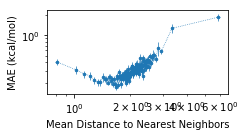

In [4]:
fig, ax = plt.subplots(figsize=(3.5, 2))

n=4
dist_col = f'train_dist_{n}'
dist_mean, dist_sem, err_mean, err_sem = zip(*[(np.mean(s[dist_col]), sem(s[dist_col]), np.mean(s['sol_acn_error'].abs()), sem(s['sol_acn_error'].abs())) 
                                       for s in np.array_split(subset.sort_values(dist_col), 128)])

ax.errorbar(dist_mean, err_mean, xerr=dist_sem, yerr=err_sem, label=f'k={n}', marker='o', 
            markersize=2.5, linestyle=':', lw=0.7)
ax.set_xscale('log', basex=10)
ax.set_yscale('log')
ax.set_xlabel('Mean Distance to Nearest Neighbors')
ax.set_ylabel('MAE (kcal/mol)')
fig.tight_layout()
fig.savefig(os.path.join('figures', 'error-vs-distance.png'), dpi=320)
fig.savefig(os.path.join('figures', 'error-vs-distance.eps'))

### Atomic-Level Features
We define the distance between molecules as the average distance of each atomic representation

In [5]:
subset = data['atomic-fingerprints']

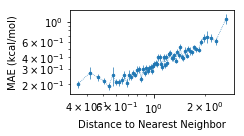

In [6]:
fig, ax = plt.subplots(figsize=(3.5, 2))

n=1
dist_col = f'train_dist_{n}'
dist_mean, dist_sem, err_mean, err_sem = zip(*[(np.mean(s[dist_col]), sem(s[dist_col]), np.mean(s['sol_acn_error'].abs()), sem(s['sol_acn_error'].abs())) 
                                       for s in np.array_split(subset.sort_values(dist_col), 64)[2:]])

ax.errorbar(dist_mean, err_mean, xerr=dist_sem, yerr=err_sem, label=f'k={n}', marker='o', 
            markersize=2.5, linestyle=':', lw=0.7)
ax.set_xscale('log', basex=10)
ax.set_yscale('log')
ax.set_xlabel('Distance to Nearest Neighbor')
ax.set_ylabel('MAE (kcal/mol)')
fig.tight_layout()
fig.savefig(os.path.join('figures', 'error-vs-distance_atomic.png'), dpi=320)
fig.savefig(os.path.join('figures', 'error-vs-distance_atomic.eps'))

Determine a "cutoff for the total error?

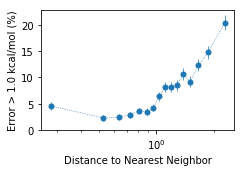

In [7]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

n=1
error_cutoff = 1 # kcal/mol
dist_col = f'train_dist_{n}'
dist_mean, dist_sem, err_mean, err_sem = zip(
    *[(np.mean(s[dist_col]), sem(s[dist_col]), 
       np.mean(s['sol_acn_error'].abs() > error_cutoff) * 100, 
       sem(s['sol_acn_error'].abs() > error_cutoff) * 100) 
      for s in np.array_split(subset.sort_values(dist_col), 16)]
)

ax.errorbar(dist_mean, err_mean, xerr=dist_sem, yerr=err_sem,
            label=f'k={n}', marker='o', 
            markersize=5, linestyle=':', lw=0.7)
ax.set_xscale('log', basex=10)
ax.set_xlabel('Distance to Nearest Neighbor')
ax.set_ylim(0)
ax.set_ylabel(f'Error >{error_cutoff: 0.1f} kcal/mol (%)')
fig.tight_layout()
fig.savefig(os.path.join('figures', 'error-vs-liklihood-bad.png'), dpi=320)
fig.savefig(os.path.join('figures', 'error-vs-liklihood-bad.eps'))

*Finding*: We can establish good cutoff for "I'm expecting this error to be large"

## Plot the Predictions on the Hold-Out Set
Just to see if there are any particularly-noticable trends.

In [8]:
subset = data['atomic-fingerprints']

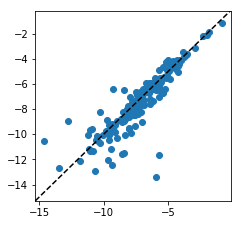

In [9]:
fig, ax = plt.subplots(figsize=(3.5, 3.5))

no_qm9 = subset.query('source != "QM9"')
ax.scatter(no_qm9['sol_acn'], no_qm9['sol_acn_pred'])

ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_xlim())
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')